Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [220]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        # xx, yy are square matrices where rows in each of them are equal
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()] # creates a matrix where first column are x1 values and second are x2 values
        # XX combinations of x1 and x2 values...
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    # Positive and negative samples will have different color based on c=y and cmap
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [221]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [222]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Tocnost klasifikatora je 1.0


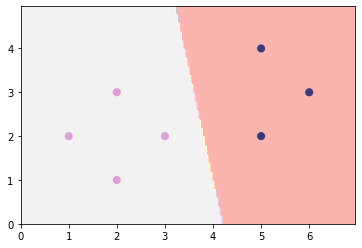

In [223]:
# Vaš kôd ovdje
ridge_classifier = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
seven_h_ridge = ridge_classifier.predict(seven_X)
plot_2d_clf_problem(seven_X, seven_y, ridge_classifier.predict)
print(f"Tocnost klasifikatora je {accuracy_score(seven_y, seven_h_ridge)}")

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Tocnost klasifikatora je 1.0


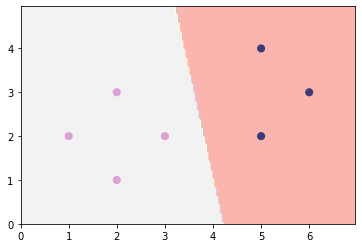

In [224]:
# Vaš kôd ovdje
linear_regression = LinearRegression().fit(seven_X, seven_y)
map_func = lambda x: 1 if x >= 0.5 else 0
seven_h_linear_regression = np.array([map_func(xi) for xi in linear_regression.predict(seven_X)])
plot_2d_clf_problem(seven_X, seven_y, lambda x: linear_regression.predict(x) >= 0.5)
print(f"Tocnost klasifikatora je {accuracy_score(seven_y, seven_h_linear_regression)}")

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [225]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Tocnost klasifikatora je 0.875


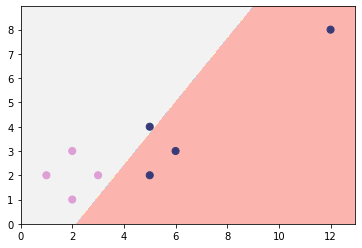

In [226]:
# Vaš kôd ovdje
outlier_h = ridge_classifier.fit(outlier_X, outlier_y).predict(outlier_X)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: ridge_classifier.predict(x) >= 0.5)
print(f"Tocnost klasifikatora je {accuracy_score(outlier_y, outlier_h)}")

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [227]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Tocnost klasifikatora je 0.875


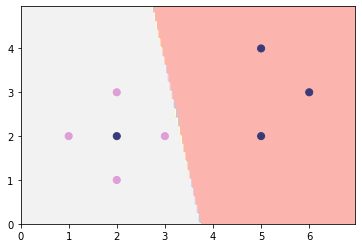

In [228]:
# Vaš kôd ovdje
unsep_h = ridge_classifier.fit(unsep_X, unsep_y).predict(unsep_X)
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: ridge_classifier.predict(x) >= 0.5)
print(f"Tocnost klasifikatora je {accuracy_score(unsep_y, unsep_h)}")

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

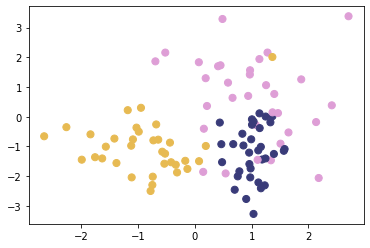

In [229]:
from sklearn.datasets import make_classification
# Vaš kôd ovdje
X_, y_ = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X_, y_)
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

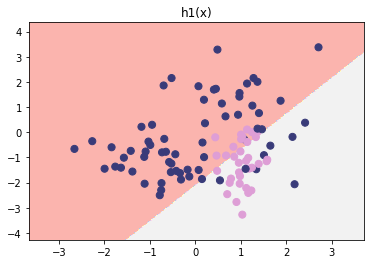

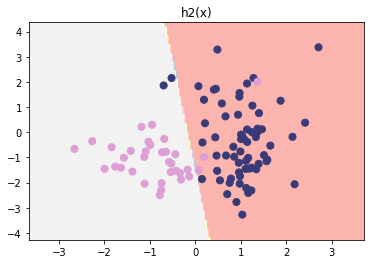

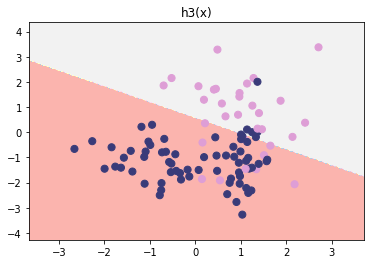

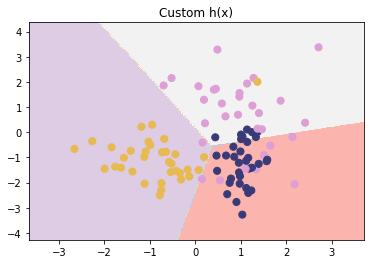

Tocnost klasifikatora je 0.82


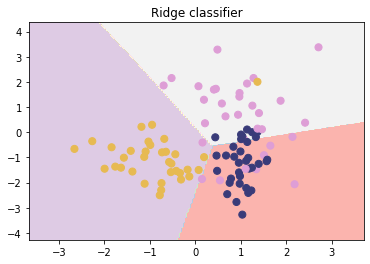

Tocnost klasifikatora je 0.82


In [230]:
# Vaš kôd ovdje

# CLASS 0
y_1 = np.array([1 if yi == 0 else 0 for yi in y_])
h1_lin_reg = LinearRegression().fit(X_, y_1)
plot_2d_clf_problem(X_, y_1, lambda x: h1_lin_reg.predict(x) >= 0.5)
plt.title("h1(x)")
plt.show()

# CLASS 1
y_2 = np.array([1 if yi == 1 else 0 for yi in y_])
h2_lin_reg = LinearRegression().fit(X_, y_2)
plot_2d_clf_problem(X_, y_2, lambda x: h2_lin_reg.predict(x) >= 0.5)
plt.title("h2(x)")
plt.show()

# CLASS 2
y_3 = np.array([1 if yi == 2 else 0 for yi in y_])
h3_lin_reg = LinearRegression().fit(X_, y_3)
plot_2d_clf_problem(X_, y_3, lambda x: h3_lin_reg.predict(x) >= 0.5)
plt.title("h3(x)")
plt.show()

# Custom Model
def predict(x):
    h1 = h1_lin_reg.predict(x)
    h2 = h2_lin_reg.predict(x)
    h3 = h3_lin_reg.predict(x)
    for i in range(x.shape[0]):
        if h1[i] > h2[i]:     # h1 > h2
            if h1[i] > h3[i]: # h1 > h2 > h3
                h1[i] = 0     # CLASS 0
            else:             # h3 > h1 > h2
                h1[i] = 2     # CLASS 2
        else:                 # h2 > h1
            if h2[i] > h3[i]: # h2 > h1 > h3
                h1[i] = 1     # CLASS 1
            else:             # h3 > h2 > h1
                h1[i] = 2     # CLASS 2
    return h1
    
plot_2d_clf_problem(X_, y_, lambda x: predict(x))
plt.title("Custom h(x)")
plt.show()
print(f"Tocnost klasifikatora je {accuracy_score(y_, predict(X_))}")

# Ridge classifier
ridge_classifier.fit(X_, y_)
plot_2d_clf_problem(X_, y_, lambda x: ridge_classifier.predict(x))
plt.title("Ridge classifier")
plt.show()
print(f"Tocnost klasifikatora je {accuracy_score(y_, ridge_classifier.predict(X_))}")

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

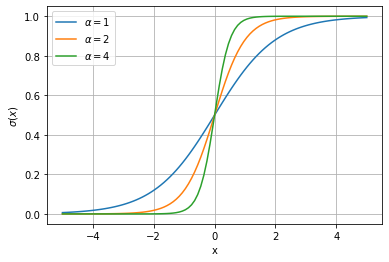

In [231]:
# Vaš kôd ovdje
def sigm(x, alpha=1):
    return 1 / (1 + np.exp(-alpha * x))
x = np.linspace(-5, 5, 100)
for a in [1, 2, 4]:
    plt.plot(x, [sigm(xi, alpha=a) for xi in x], label=r"$\alpha = {}$".format(a))
plt.xlabel("x")
plt.ylabel(r"$\sigma(x)$")
plt.legend()
plt.grid(True)
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [370]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
polynom_d = PolynomialFeatures()

def lr_h(x, w):
    return sigm(w.T.dot(x))

def cross_entropy_error(X, y, w):
    h = [lr_h(xi, w) for xi in X]
    return 1 / X.shape[0] * np.sum([-yi * np.log(hi) - (1 - yi) * np.log(1 - hi)
                                    for yi, hi in zip(y, h)])

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    # Vaš kôd ovdje
    # Add 1st column biases
    X_ = polynom_d.set_params(degree=1).fit_transform(X)
    # Allocate weights matrix.
    weights_per_iter = np.zeros(shape=(0, X_.shape[1]))
    # Start the training proccess.
    for iter in range(max_iter):
        last_iter = iter
        # Weights for current iteration.
        w_iter = np.zeros(shape=(X_.shape[1],)) if iter == 0 else weights_per_iter[-1].copy()
        
        # Calculate error before updating.
        previous_error = cross_entropy_error(X_, y, w_iter)
        
        # Calculate delta weights.
        delta_w = np.zeros(shape=(w_iter.shape[0],))
        for xi, yi in zip(X_, y):
            h = lr_h(xi, w_iter)
            delta_w -= (h - yi) * xi
        
        # Update w0.
        w_iter[0] = w_iter[0] + eta * delta_w[0]
        # Update weights.
        w_iter[1:] = w_iter[1:] * (1 - eta * alpha) + eta * delta_w[1:]
        # Add updates weights into the weights matrix.
        weights_per_iter = np.append(weights_per_iter, [w_iter], axis=0)
        
        # Check for stop condition.
        current_error = cross_entropy_error(X_, y, w_iter)
        if (np.absolute(current_error - previous_error) <= epsilon):
            break
        previous_error = current_error
        
    print(f"Pronadeno rjesenje u {last_iter + 1}. iteraciji!")
    return (weights_per_iter[-1], weights_per_iter) if trace else weights_per_iter[-1]

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Pronadeno rjesenje u 2000. iteraciji!
Izracunate tezine: [ 6.44150959 -2.11012128  0.53522851]
Pogreška unakrsne entropije: 0.07751718252492557
Tocnost klasifikatora je 1.0


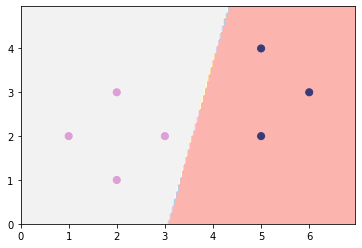

In [394]:
# Vaš kôd ovdje
w, w_per_iter = lr_train(seven_X, seven_y, trace=True, epsilon=1e-15)
error = cross_entropy_error(polynom_d.set_params(degree=1).fit_transform(seven_X), seven_y, w)
h_func = lambda x: sigm(np.sum(w.T * polynom_d.fit_transform(x), axis=1)) >= 0.5
print(f"Izracunate tezine: {w}")
print(f"Pogreška unakrsne entropije: {error}")
print(f"Tocnost klasifikatora je {accuracy_score(seven_y, h_func(seven_X))}")
plot_2d_clf_problem(seven_X, seven_y, h_func)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [372]:
from sklearn.metrics import zero_one_loss

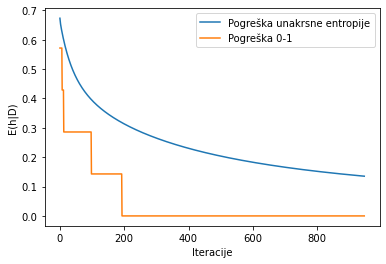

In [373]:
# Vaš kôd ovdje
X_ = polynom_d.fit_transform(seven_X)
# Map to True/False values.
h = np.array([sigm(np.sum(wi.T * X_, axis=1)) >= 0.5 for wi in w_per_iter])
errors_cross_entropy = [cross_entropy_error(X_, seven_y, wi) for wi in w_per_iter]
errors_zero_one_loss = [zero_one_loss(seven_y, hi) for hi in h]
plt.plot(errors_cross_entropy, label="Pogreška unakrsne entropije")
plt.plot(errors_zero_one_loss, label="Pogreška 0-1")
plt.xlabel("Iteracije")
plt.ylabel("E(h|D)")
plt.legend()
plt.show()

Pronadeno rjesenje u 1142. iteraciji!
Pronadeno rjesenje u 947. iteraciji!
Pronadeno rjesenje u 511. iteraciji!
Pronadeno rjesenje u 378. iteraciji!


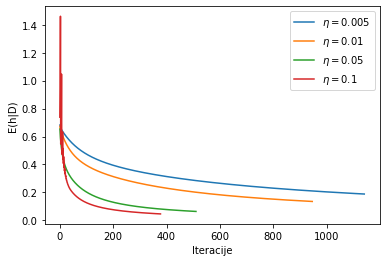

In [377]:
etas = [0.005, 0.01, 0.05, 0.1]
for eta_i in etas:
    w, w_per_iter = lr_train(seven_X, seven_y, eta=eta_i, trace=True)
    errors_cross_entropy = [cross_entropy_error(X_, seven_y, wi) for wi in w_per_iter]
    plt.plot(errors_cross_entropy, label=r"$\eta = {}$".format(eta_i))
plt.xlabel("Iteracije")
plt.ylabel("E(h|D)")
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Tezine: [ 5.33129609 -1.18244419 -0.30251926]
Pogreska unakrsne entropije: 9.992007221626415e-16
Tocnost klasifikatora je 1.0


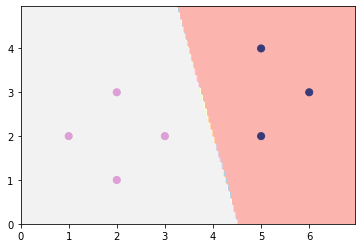

In [393]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# Vaš kôd ovdje
logistic_regression = LogisticRegression(max_iter=2000).fit(seven_X, seven_y)
print(f"Tezine: {np.insert(logistic_regression.coef_, 0, logistic_regression.intercept_[0])}")
print(f"Pogreska unakrsne entropije: {log_loss(seven_y, logistic_regression.predict(seven_X) >= 0.5)}")
print(f"Tocnost klasifikatora je {accuracy_score(seven_y, logistic_regression.predict(seven_X) >= 0.5)}")
plot_2d_clf_problem(seven_X, seven_y, lambda x: logistic_regression.predict(x) >= 0.5)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

In [ ]:
# Vaš kôd ovdje

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

In [ ]:
# Vaš kôd ovdje

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

In [ ]:
# Vaš kôd ovdje

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [ ]:
from numpy.linalg import norm

In [ ]:
# Vaš kôd ovdje

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

In [ ]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?